# Supervised Learning

In this lab, you will build a simple text classifier to predict whether a movie review has positive or negative sentiment. You will learn to use a count-based bag-of-words model and logistic regression from `sklearn` library to do this.
We will use [IMDB movie review dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

# Download data
First, let's download the data. Run the following commands to download and unzip the data.



In [10]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xzf aclImdb_v1.tar.gz

--2021-02-09 02:19:20--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.1’

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  6.97MB/s    in 15s     

2021-02-09 02:19:36 (5.44 MB/s) - ‘aclImdb_v1.tar.gz.1’ saved [84125825/84125825]



The downloaded IMDB dataset should now be under `/content/` folder.

In [12]:
!ls /content/aclImdb/

ls: /content/aclImdb/: No such file or directory


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Preprocess and load the data

Here, we will load the data and preprocess it. We will extract features from our data and transform the features into vector (or matrix) form.

In [4]:
def preprocess_text(text):
    """
    Function that preprocesses the string
    """
    preprocessed_text = text.lower().replace("<br />", "")
    return preprocessed_textNum
        
    
def read_file(file_name, label):
    """
    Function that reads a file 
    and return the raw text, preprocessed text, and label
    """
    with open(file_name, "r") as f:
        raw_text = f.read()
        preprocessed_text = preprocess_text(raw_text)
    return raw_text, preprocessed_text, label

def construct_dataset(dataset_dir):
    """
    Function that loads a dataset
    @param offset: skip first offset items in this dir
    """
    pos_dir = os.path.join(dataset_dir, "pos")
    neg_dir = os.path.join(dataset_dir, "neg")
    dir_list = [neg_dir, pos_dir]
    raw_contents, contents, labels = [], [], []
    all_pos = os.listdir(pos_dir)
    all_neg = os.listdir(neg_dir)
    data_size = len(all_neg)
    for i in range(data_size):
        for lbl, dataset in enumerate([all_neg, all_pos]):
          raw_content, content, label = read_file(os.path.join(dir_list[lbl], dataset[i]), lbl)
          contents.append(content)
          raw_contents.append(raw_content)
          labels.append(label)

    return raw_contents, contents, labels

In [5]:
path = "/content/aclImdb/"
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")
sentiments = ["Negative", "Positive"]

The dataset is already split into training and test set.
However, we should not touch the test data during initial model hyperparameter tuning and model selection stage. 
Let's split the given train data into training set and validation set.

In [8]:
import numpy as np

In [9]:
test_raw_contents, test_contents, test_labels = construct_dataset(test_dir)
raw_contents, contents, labels = construct_dataset(train_dir)

# with shuffling
train_size = int(len(raw_contents)*0.8)
train_idces = list(np.random.choice(len(raw_contents), size=train_size, replace=False))
val_idces = list(set(range(len(raw_contents))) - set(train_idces))
def get_sublist_by_idces(l, idces):
    return [l[idx] for idx in idces]

# TODO: split data from train_dir into train, and validation set
# train_raw_contents, train_contents, train_labels = ?
# val_raw_contents, val_contents, val_labels = ?
# ADD CODE HERE

train_raw_contents, train_contents, train_labels = get_sublist_by_idcesist_by_idces(raw_contents, train_idces), get_sublist_by_idces(contents, train_idces),  get_sublist_by_idces(labels, train_idces)

val_raw_contents, val_contents, val_labels = val_sublist_by_idcesist_by_idces(raw_contents, val_idces), get_sublist_by_idces(contents, val_idces),  get_sublist_by_idces(labels, val_idces)



# no shuffling
train_split = int(len(raw_contents)*0.8)
train_raw_contents, train_contents, train_labels = raw_contents[:train_split], contents[:train_split], labels[:train_split]
val_raw_contents, val_contents, val_labels = raw_contents[train_split:], contents[train_split:], labels[train_split:]

print(f"Train size: {len(train_contents)}, "
      f"\nVal size: {len(val_contents)}, "
      f"\nTest size: {len(test_contents)}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/aclImdb/test/pos'

In [ ]:
np.random.choice? # Given some array, we generate a random choice. 

In [ ]:
print("Review: ", train_raw_contents[0])
print("Sentiment: ", sentiments[train_labels[0]])

Review:  From the pen of Richard Condon (The Manchurian Candidate 1962) comes this muddled tale of political intrigue and assassination. The story, told in almost comic book fashion is difficult to swallow. All-star cast considered, this poor effort is not entirely the fault of the cast and crew: the novel was replete with the same short-comings. It seems as though at times the story is actually mocking the more sincere effort put forth in "Manchurian Candidate." A disappointment on all counts.
Sentiment:  Negative


# Bag of words
Our training data is in text format, but for feeding it as input to a machine learning model, we need to transform the text into numbers.

To do this is to represent each example in the data as a vector of word counts.

For example:  
X = ['NLP is fun', 'NYU is fun'] 

features = ['NLP', 'is', 'fun', 'NYU']  

Vectorized_X:  
[ [1 1 1 0]   
  [0 1 1 1 ]  ]



Using `sklearn.feature_extraction.text.CountVectorizer`, we will construct a `CountVectorizer` class that extract features from training data using the most frequent words in the training data.

We will then transform the text data into BoW vector representations using the `transform` function of the `CountVectorizer` --- each row of the input matrix (vector) corresponds to an example in the dataset, each column corresponds to a word, and each entry corresponds to the number of times that word appears in the corresponding example.


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# TODO: YOUR CODE HERE

vectorizer = countVectorizer(max_features = 2000)
vectorizer.fit(train_contents)
X_train = vectorizer.transform(train_contents)
X_val = vectorizer.transform(val_contents)
X_test = vectorizer.transform(test_contents)


y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)


vocab = vectorizer.get_feature_names()




In [ ]:
X_train

<20000x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 2058444 stored elements in Compressed Sparse Row format>

In [ ]:
CountVectorizer?

# Logistic Regression

Now, we will train a logistic regression classifier on our data. 



In [ ]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
model = LogisticRegression(random_state=0, solver='liblinear')

# Fit the model to training data
model.fit(X_train, y_train)

# make prediction using the trained model
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

Report the accuracy of the model on training and validation set.  
Hint: `sklearn.metrics.accuracy_score`

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
# TODO: YOUR CODE HERE

print("Training accuracy:", train_accuracy)
print("Validation accuracy:", val_accuracy) 

Training accuracy: 0.9162
Validation accuracy: 0.8598


Let's check prediction of the model on a random example in validation set.

In [ ]:
import random
j = random.randint(0,len(y_val))
print("True label: ", sentiments[y_val[j]])
print("Prediction: " , sentiments[y_val_pred[j]])
print(val_raw_contents[j].strip())

True label:  Negative
Prediction:  Negative
Cage (1989) was another one of those low budget "buddy" action flicks that were produced during the 80's thanks in large part due to the films such as 48hrs. and Lethal Weapon. This one stars Reb Brown and Lou Ferrigno as to former Vietnam Vets who happen to run a local dive bar. Reb takes care of Lou because he saved his life in 'Nam. But Lou was shot in the head and is now pretty soft. Although he's huge, Lou has the brain of a child. One day some ruffians throw their wait around in the bar and Lou and Rebb beat the tar out of them. But payback's a mother. They crash the bar leaving Lou and Reb with nothing. That is until these two thugs come into the picture (one of them's a real nice guy) who have a plan in mind.<br /><br />The film's a waste of time. Maybe if they went all they way and made a hard core action flick instead of trying to tone down the gruesomeness of the situation perhaps it could have worked. Alas, it doesn't and the audi

Finally, we can check the coefficients, or learned weights, of each word feature to understand which features are generally associated with positive or negative sentiment.

In [ ]:
coefficients = model.coef_[0]
indices = np.argsort(coefficients) 
# Most negatively weighted
print("Words associated with negative sentiment")
for i in indices[:10]:
  print(vocab[i], coefficients[i])
print()
# Most positively weighted
print("Words associated with positive sentiment")
for i in indices[-10:]: 
  print(vocab[i], coefficients[i])

Words associated with negative sentiment
waste -2.2030419152353864
disappointment -2.1390028614165746
poorly -1.8302734520326087
worst -1.676519175081149
unfunny -1.5801761844658195
redeeming -1.5784992684504315
awful -1.4925566477929813
laughable -1.4267011920044212
lacks -1.3768668984501045
dull -1.3341973990799108

Words associated with positive sentiment
surprisingly 1.1078301145783807
touching 1.1143425609925224
excellent 1.1912593036143042
subtle 1.260668780396516
gem 1.281001164108966
rare 1.2879455112442568
superb 1.294879991487984
funniest 1.4036014341215113
noir 1.43662669354639
wonderfully 1.5124104636462186


In [ ]:
from wordcloud import WordCloud

positive_word_score_dict = {}
negative_word_score_dict = {}

for i in indices:
    positive_word_score_dict[vocab[i]] = coefficients[i]
    negative_word_score_dict[vocab[i]] = -coefficients[i]

positive_wordcloud = WordCloud(width=500,height=500,scale=10,background_color=None,mode='RGBA').generate_from_frequencies(positive_word_score_dict)
negative_wordcloud = WordCloud(width=500,height=500,scale=10,background_color=None,mode='RGBA').generate_from_frequencies(negative_word_score_dict)

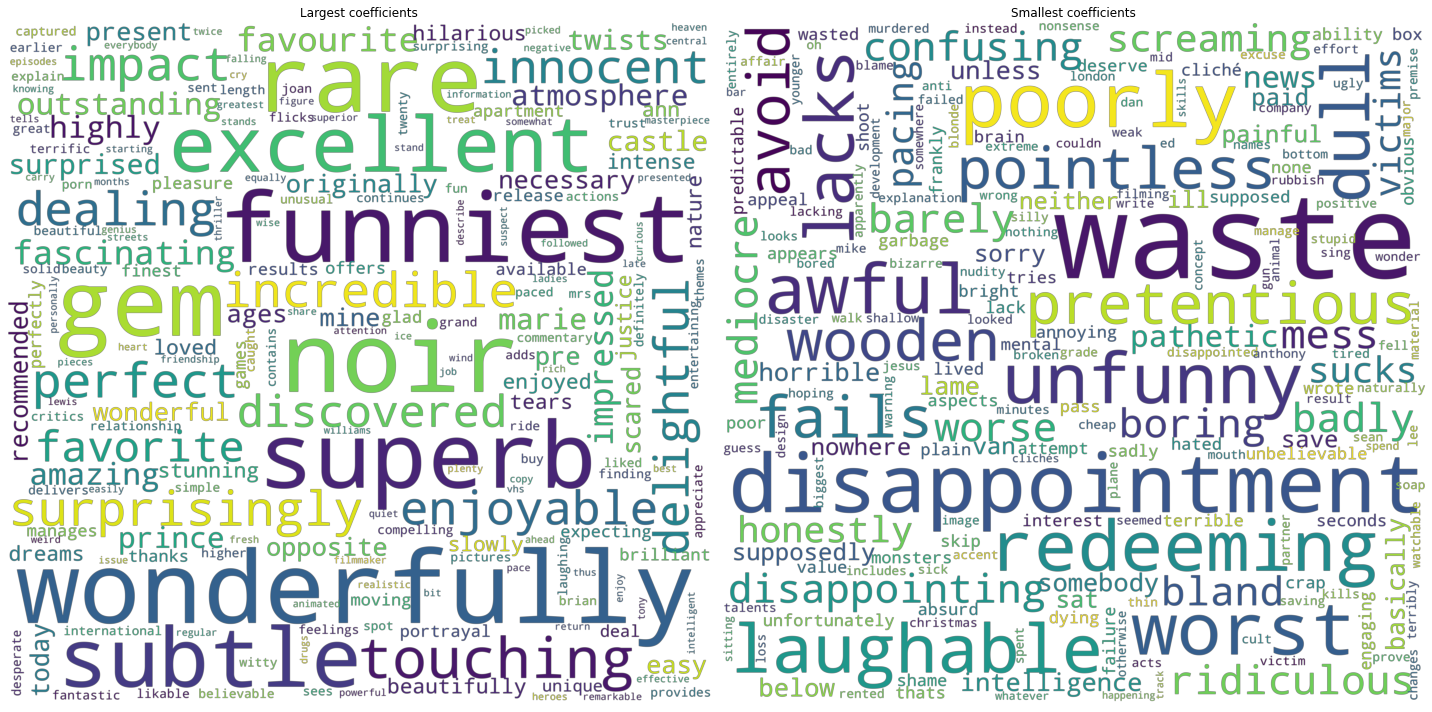

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].imshow(positive_wordcloud, interpolation='bilinear', aspect='auto')
ax[0].axis('off')
ax[0].set_title('Largest coefficients')
ax[1].imshow(negative_wordcloud, interpolation='bilinear', aspect='auto')
ax[1].axis('off')
ax[1].set_title('Smallest coefficients')

plt.tight_layout()


### How performance depends on size of train data? Learning curve.

Let's explore how train, val performance changes depending on how much data the model uses for training.

Your task is to train the model on train subsets of different sizes (randomly pick `n` reviews from train), calculate train and val accuracies in each case and plot the results (with train size on x axis, accuracy on y axis) -- there will be two curves, for train and for val. This plot is called Learning curve.

In [ ]:
train_sizes = np.arange(1000, len(y_train), 1000)
scores_train = []
scores_val = []

for train_size in train_sizes:
    """
    TODO: YOUR CODE GOES HERE
    """
    
    
    

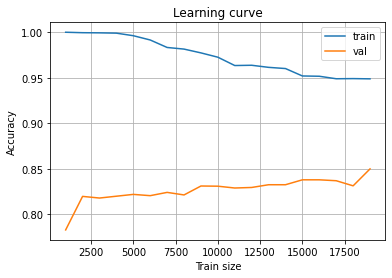

In [ ]:

plt.plot(train_sizes, scores_train, label="train")
plt.plot(train_sizes, scores_val, label="val")
plt.title("Learning curve")
plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Hyperparameter Tuning & Model Selection
There are hyperparameters -- the model configuration whose value is set before learning process -- associated with each model design. 
For example, in `vectorizer = CountVectorizer(max_features=2000)`, `max_features=2000` is a hyperparameter.

We train the models with different hyperparameters and select the model that has the best validation performance as the best model. And, we report the performance of that best model on the test data as our final test score. 
(You should **never** use test data for hyperparameter tuning and model selection).

Now, try tuning the hyperparameters of the model using validation set and report the test accuracy of the best model!


### How performance depends on the number of features?  
Similar to the previous section, explore how val performance changes depending on different sizes of `max_features`.

In [ ]:
max_feature_sizes = np.arange(100, 4000, 500)
scores_train = []
scores_val = []

for max_feature in max_feature_sizes:
    print(max_feature)
    """
    TODO: YOUR CODE GOES HERE
    """
    vect = CountVectorizer(max_featurs = max_feature)
    vect.fit(train_contents)
    X_train_vect = vect.transform(train_contents)
    X_val_vect = vect.transform(val_contents)
    
    model = LogisticRegression(random)
    
    

100
600
1100
1600
2100
2600
3100
3600
4100
4600
5100
5600
6100
6600
7100
7600
8100
8600
9100
9600


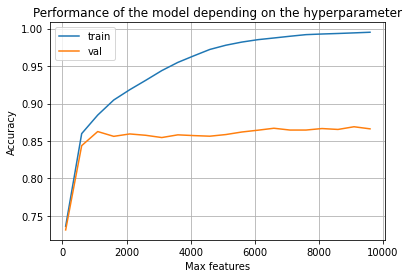

In [ ]:

plt.plot(max_feature_sizes, scores_train, label="train")
plt.plot(max_feature_sizes, scores_val, label="val")
plt.title("Performance of the model depending on the hyperparameter")
plt.xlabel("Max features")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()